In [7]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
df = pd.read_csv('../data/spambase_augmented.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 1186 entries, 0.000 to 1
dtypes: float64(1185), int64(1)
memory usage: 41.6 MB


In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('df shape : ' , df.shape)
print('X shape : ' , X.shape)
print('y shape : ', y.shape)  

df shape :  (4600, 1186)
X shape :  (4600, 1185)
y shape :  (4600,)


In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train_error = []
test_error = []
train_sizes = np.linspace(0.1, 0.9, 9)

for train_size in train_sizes:
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=train_size,random_state=42)
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)

    #train error
    y_train_pred = clf.predict(X_train)
    cur_training_err = 1 - accuracy_score(y_train, y_train_pred)

    # Compute test error
    y_test_pred = clf.predict(X_test)
    cur_test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_error.append(cur_training_err)
    test_error.append(cur_test_error)



In [12]:
print('train error : ', train_error)
print('test error ', test_error)

train error :  [0.0, 0.0, 0.0014492753623188692, 0.0010869565217391797, 0.0008695652173913437, 0.0007246376811593791, 0.0006211180124223725, 0.0005434782608695343, 0.0007246376811593791]
test error  [0.08768115942028987, 0.07744565217391308, 0.0636645962732919, 0.05471014492753623, 0.058260869565217366, 0.05217391304347829, 0.06304347826086953, 0.06630434782608696, 0.047826086956521685]


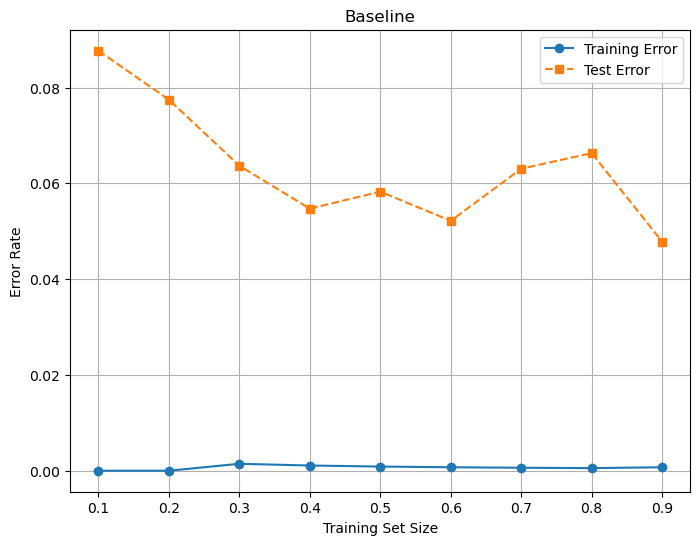

In [13]:
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_error, label="Training Error", marker='o', linestyle='-')
plt.plot(train_sizes, test_error, label="Test Error ", marker='s', linestyle='--')
plt.xlabel("Training Set Size")
plt.ylabel("Error Rate")    
plt.title("Baseline")
plt.legend()
plt.grid(True)
plt.show()